# Titanic Dataset


## Name: Sharwari Shah

## 1. Introduction

- Write a short introduction/background about your data. (include information of data source)
- What is your research objective(s) and goal(s)



Answer:
- I have chosen the Titanic Dataset, which is a popular open-source dataset that offers information on the passengers onboard the Titanic ship when it sank on April 15, 1912.
(Source: https://hackernoon.com/15-excel-datasets-for-data-analytics-beginners).

- The main objective is to explore the dataset and analyze survival patterns based on passenger demographics, ticket class, fares and other factors

### EDA Hypotheses

The main questions I want to ask to the dataset are:

- What is the survival rate across different passenger classes?
  - I am interested in this because it helps to understand if the social class influenced the survival rates that is it highlights the biases in survival based on socioeconomic status
- How does age distribution differ between survivors and non-survivors?
  - This would reveal which age group are more likely to survive. It indicates if age played a role in survival decisions or outcomes which would be interesting to know
- What is the relationship between gender and survival rate?
  - This examines if gender influenced survival rates and its outcome can reveal any biases that shows how males and females are treated during disasters basically gender disparities

## 2. Data Analysis

### 2-1.  Importing the libraries necessary for your EDA

In [200]:
import pandas as pd

# Load the dataset
data = pd.read_excel('Titanic.xlsx', sheet_name='Titanic.csv')

### 2-2. Import libraries for EDA

In [201]:
# Import libraries

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In this I am importing Seaborn which is used for complex statistical visualizations like Heatmap, boxplot while Matplotlib is more suitable for creating basic plots. I have also imported warning that helps control the warnings and the 'filterwarnings' tells Python to ignore any warnings that might occur; just added this to avoid clutter. 

### 2-3. Review Data

In [202]:
# Check data dimensions
print("Data Dimensions:", data.shape)

Data Dimensions: (891, 26)


In [203]:
# Check data types and structure
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Unnamed: 12  0 non-null      float64
 13  Unnamed: 13  0 non-null      float64
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unnamed:

In [204]:
# Summary statistics for quantitative variables
print(data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  Unnamed: 12  Unnamed: 13  Unnamed: 14  \
count  891.000000  891.000000          0.0          0.0          0.0   
mean     0.381594   32.204208          NaN          NaN          NaN   
std      0.806057   49.693429          NaN          NaN          NaN   
min      0.000000    0.000000          NaN          NaN          NaN   
25%      

### 2-4. Generate Sub-dataset

In [205]:
# Subset with relevant columns for analysis
sub_data = data[['PassengerId','Survived', 'Pclass', 'Age', 'Sex', 'Fare', 'Embarked']]

print(sub_data)

     PassengerId  Survived  Pclass   Age     Sex     Fare Embarked
0              1         0       3  22.0    male   7.2500        S
1              2         1       1  38.0  female  71.2833        C
2              3         1       3  26.0  female   7.9250        S
3              4         1       1  35.0  female  53.1000        S
4              5         0       3  35.0    male   8.0500        S
..           ...       ...     ...   ...     ...      ...      ...
886          887         0       2  27.0    male  13.0000        S
887          888         1       1  19.0  female  30.0000        S
888          889         0       3   NaN  female  23.4500        S
889          890         1       1  26.0    male  30.0000        C
890          891         0       3  32.0    male   7.7500        Q

[891 rows x 7 columns]


In [206]:
# Rename columns for clarity
sub_data.rename(columns={'Pclass': 'Passenger_Class', 'Fare': 'Ticket_Fare'}, inplace=True)

print(sub_data)

     PassengerId  Survived  Passenger_Class   Age     Sex  Ticket_Fare  \
0              1         0                3  22.0    male       7.2500   
1              2         1                1  38.0  female      71.2833   
2              3         1                3  26.0  female       7.9250   
3              4         1                1  35.0  female      53.1000   
4              5         0                3  35.0    male       8.0500   
..           ...       ...              ...   ...     ...          ...   
886          887         0                2  27.0    male      13.0000   
887          888         1                1  19.0  female      30.0000   
888          889         0                3   NaN  female      23.4500   
889          890         1                1  26.0    male      30.0000   
890          891         0                3  32.0    male       7.7500   

    Embarked  
0          S  
1          C  
2          S  
3          S  
4          S  
..       ...  
886   

In [207]:
# Check missing values
print(sub_data.isnull().sum())

PassengerId          0
Survived             0
Passenger_Class      0
Age                177
Sex                  0
Ticket_Fare          0
Embarked             2
dtype: int64


In [208]:
# Fill missing values for Age
sub_data['Age'].fillna(sub_data['Age'].mean(), inplace=True)

# Drop rows with missing Embarked
sub_data.dropna(subset=['Embarked'], inplace=True)

# Check missing values
print(sub_data.isnull().sum())

PassengerId        0
Survived           0
Passenger_Class    0
Age                0
Sex                0
Ticket_Fare        0
Embarked           0
dtype: int64


In [209]:
# Check for duplicates
print("Duplicated Rows:", sub_data.duplicated().sum())

Duplicated Rows: 0


### 2-5. Checking Outliers

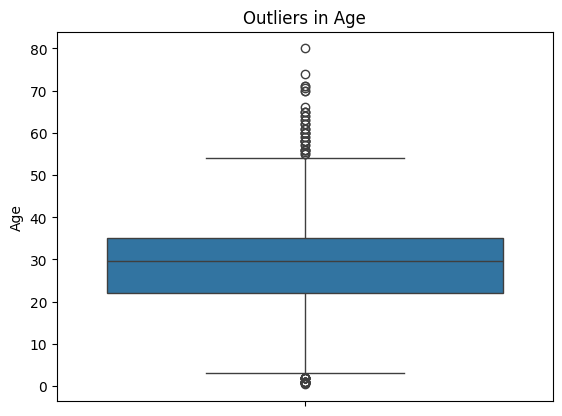

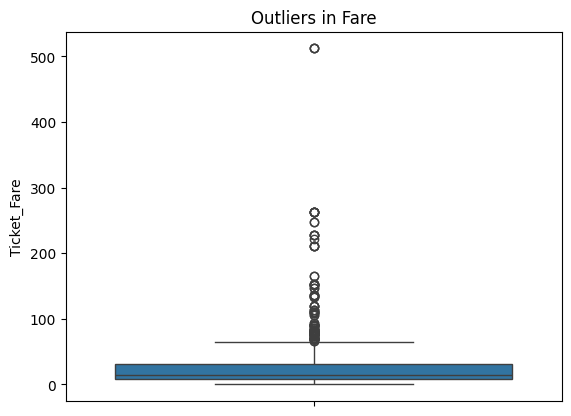

In [210]:
# Detect outliers using boxplots for Age and Fare
sns.boxplot(data=sub_data, y='Age')
plt.title('Outliers in Age')
plt.show()

sns.boxplot(data=sub_data, y='Ticket_Fare')
plt.title('Outliers in Fare')
plt.show()

Boxplots are useful for visualizing the distribution of data and identifying outliers. The box represents the IQR and points outside the whiskers are mostly outliers. 

In [211]:
# Rmove outliers

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile
    Q3 = df[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter data within bounds
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In this I am trying to remove the outliers using IQR method. Also, Quantile returns the values at the given quantile over required axis from the dataframe

In [212]:
# Remove outliers for Age
sub_data_no_outliers = remove_outliers(sub_data, 'Age')

# Remove outliers for Fare
sub_data_no_outliers = remove_outliers(sub_data_no_outliers, 'Ticket_Fare')

print("Data dimensions after removing outliers:", sub_data_no_outliers.shape)

Data dimensions after removing outliers: (718, 7)


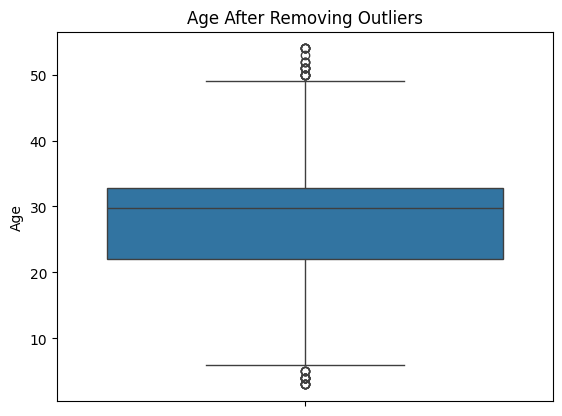

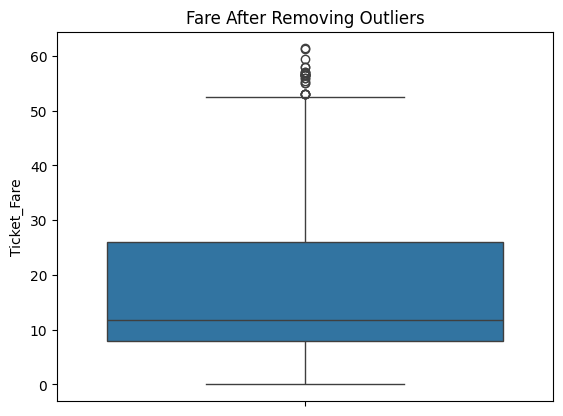

In [213]:
# Verifying outlier removal

sns.boxplot(data=sub_data_no_outliers, y='Age')
plt.title('Age After Removing Outliers')
plt.show()

sns.boxplot(data=sub_data_no_outliers, y='Ticket_Fare')
plt.title('Fare After Removing Outliers')
plt.show()


Verifying the box plots to visually verify if the outliers are removed correctly

### 2-6. Generating Plots

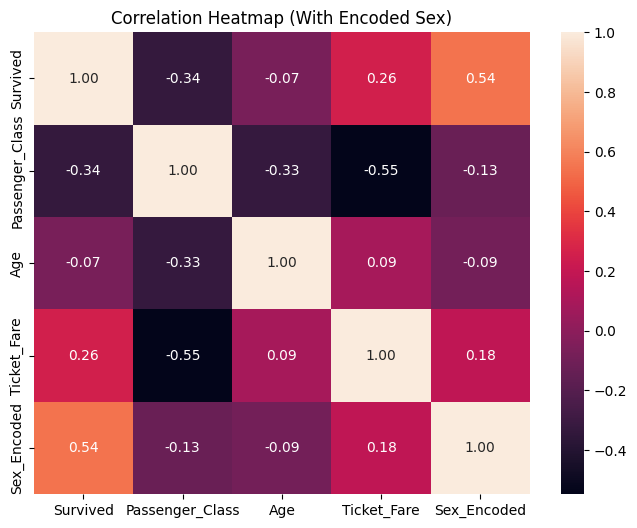

In [214]:
# Encode 'Sex' column (e.g., male=0, female=1)
sub_data['Sex_Encoded'] = sub_data['Sex'].map({'male': 0, 'female': 1})

# Include encoded column in numeric data
numeric_data = sub_data[['Survived', 'Passenger_Class', 'Age', 'Ticket_Fare', 'Sex_Encoded']]

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(8, 6)) # Figure size
sns.heatmap(correlation_matrix, annot=True, fmt=".2f") #Heatmap plot
plt.title('Correlation Heatmap (With Encoded Sex)') # Plot title
plt.show() # Display the plot

- 'map' is used to encode the categorical data into numerical data as heatmap requires numerical inputs
- 'corr' computes the correlation matrix for the data. The value of this correlation can be between -1 to 1 where -1 means negatively correlated and 1 perfect positive correlation and 0 indicates no linear correlation
- 'heatmap' created the heatmap plot, 'annot' adds numerical annotations to each cell and '.2f' formats the annotations to only show upto 2 decimals
- 'figsize' is to adjust the heatmap size
- 'show' displays the heatmap
- This code is basically trying to find the correlation between each variables; so that the variables which are strongly correlated might be redundant while model training but if the target variable is 'Survived' then the variables which are strongly correlated with it might be the potential predictors for survival and play a major role in model training
- The most positive corelated features are Survived vs Sex (0.54) which shows that survival rate is very much dependent on if male or female gender
- The negative correlation between Passenger_class and survival rate(-0.34) just means that lower the class that is (Class 1) has highest survival rate
- These are further explored and analyzed separately

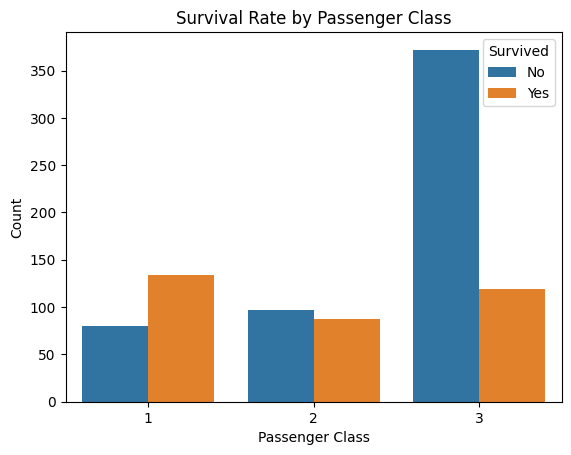

,Passenger Class,Survival Rate (%)
0,1,62.616822
1,2,47.282609
2,3,24.236253


In [215]:
# Survival Rate by Passenger Class
sns.countplot(data=sub_data, x='Passenger_Class', hue='Survived') #Countplot
plt.title('Survival Rate by Passenger Class') # Plot title
plt.xlabel('Passenger Class') # X-axis label
plt.ylabel('Count') # Y-axis label
plt.legend(title='Survived', labels=['No', 'Yes']) #legend 
plt.show() # Display plot


# Calculate survival rate by passenger class
survival_rates = sub_data.groupby('Passenger_Class')['Survived'].mean() * 100

# Create a DataFrame for the survival rates
survival_rates_df = pd.DataFrame({
    'Passenger Class': survival_rates.index,
    'Survival Rate (%)': survival_rates.values
})

# Print the survival rates as a table
survival_rates_df

- Here, I am trying to find a relation between survival rate and passenger class. It can seen from the plot that most of the passengers from Class 1 survived. 
- Also, the same can be observed from the survival_rate dataframe table where it shows that 62.6% of people from Class 1 survived and the lowest survival rate is that of class 3 which 24.23% showing the socioeconomic bias
- 'hue' is basically used to color the bars which here is basically the passenger survived or not
- 'groupby' helps to group the data by a particular variable which here is Passenger_Class
- Mean is used to calculate the mean of the grouped data, '*100' multiples by 100 just used to calculate percent

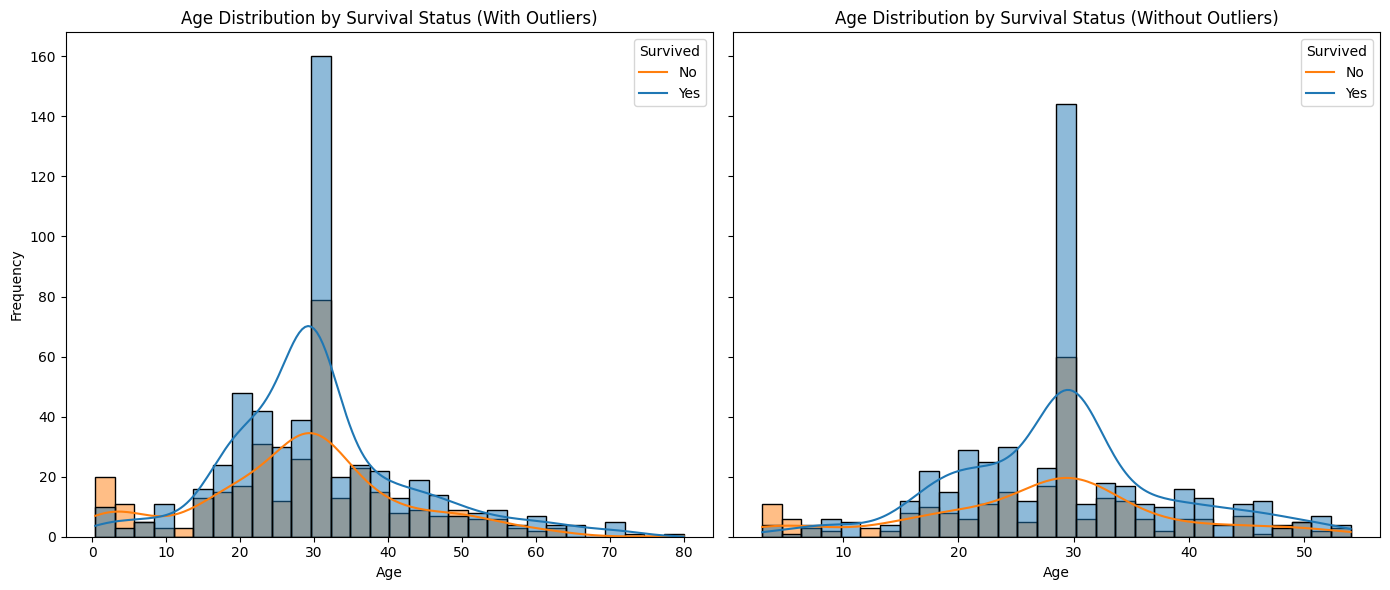

Survived,0,1,Survival_Percentage
Age_Group,,,
0-10,24,38,61.290323
10-20,61,41,40.196078
20-30,268,129,32.493703
30-40,94,72,43.373494
40-50,55,34,38.202247
50-60,28,20,41.666667
60-70,13,5,27.777778
70-80,6,0,0.000000


In [216]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot Age Distribution with Outliers
sns.histplot(data=sub_data, x='Age', hue='Survived', kde=True, bins=30, ax=axes[0]) # Plot histogram
axes[0].set_title('Age Distribution by Survival Status (With Outliers)') # Plot Title
axes[0].set_xlabel('Age') # X-axis label
axes[0].set_ylabel('Frequency') # Y-axis label
axes[0].legend(title='Survived', labels=['No', 'Yes']) # Legend

# Plot Age Distribution without Outliers
sns.histplot(data=sub_data_no_outliers, x='Age', hue='Survived', kde=True, bins=30, ax=axes[1]) # Plot histogram
axes[1].set_title('Age Distribution by Survival Status (Without Outliers)')  # Plot Title
axes[1].set_xlabel('Age') # X-axis label
axes[1].set_ylabel('Frequency') # Y-axis label
axes[1].legend(title='Survived', labels=['No', 'Yes'])


plt.tight_layout() #layout
plt.show() # Display plot


# Group data by survival status and age ranges
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
sub_data['Age_Group'] = pd.cut(sub_data['Age'], bins=age_bins, labels=age_labels, right=False)

# Count survival status within each age group
age_group_survival = sub_data.groupby(['Age_Group', 'Survived']).size().unstack(fill_value=0)

# Calculate survival percentages for each age group
age_group_survival['Survival_Percentage'] = (age_group_survival[1] / (age_group_survival[0] + age_group_survival[1])) * 100

age_group_survival

- Here I am mostly trying to explore and visualize the distribution of age among passengers who survived and who didn’t both with outliers and without outliers
- Mostly, without outliers I wanted to plot to see how evenly it distributes which also proves that my outliers detection and removal method was effective
- 'subplots' use to plot 1 figure but 2 plots side by side
- 'histplot' created the histogram and apart for data, X and hue which are some obvious parameters or that explained above I have added 'kde' which basically adds a kernel density estimate curve to the histogram which can be seen in the figure
- 'ax=axes' just specified which plot should go where among the 2 side by side plots
- From the plots it can observed that more children from 0-10 survived than non-survivors and the least survived where from the old age people probably due to restriction in movements

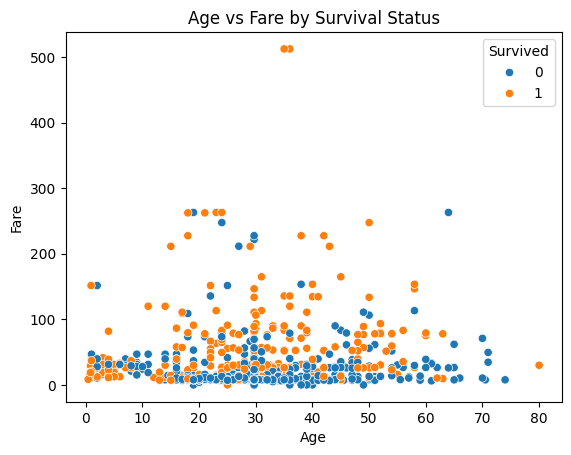

In [217]:
# Age VS Fare

# Create the scatterplot
sns.scatterplot(data=sub_data, x='Age', y='Ticket_Fare', hue='Survived') #Plot scatterplot
plt.title('Age vs Fare by Survival Status') #Title of the plot
plt.xlabel('Age') # x-axis label
plt.ylabel('Fare') # y-axis label
plt.legend(title='Survived') #Add legend
plt.show()  # Display

- This plot helps to identify if there is a relationship between age and fare among survivors and non-survivors
- 2 patterns are observed here
  - Higher the fare more survival rate showing bias in socioeconomic factors
  - Small children had highest survival rate

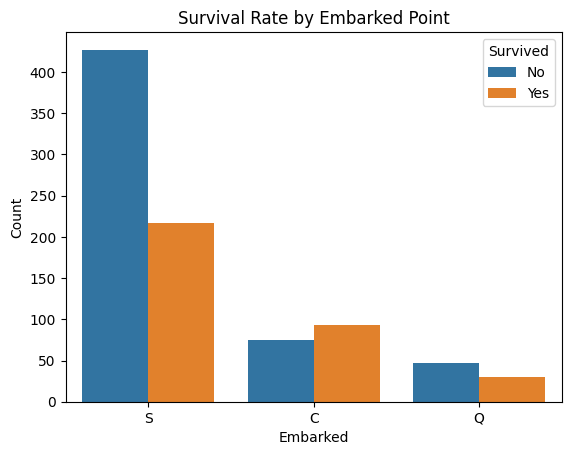

Survived  Survival_Percentage
Embarked                     
C                   55.357143
Q                   38.961039
S                   33.695652


In [218]:
# Survival rate by embarked

sns.countplot(data=sub_data, x='Embarked', hue='Survived') #Plot countplot
plt.title('Survival Rate by Embarked Point') #Title of plot
plt.xlabel('Embarked') # x-axis label
plt.ylabel('Count') # y-axis label
plt.legend(title='Survived', labels=['No', 'Yes']) #legend
plt.show() # Display


# Group data by 'Embarked' and 'Survived' and calculate counts
survival_counts = sub_data.groupby(['Embarked', 'Survived']).size().unstack(fill_value=0)

# Calculate survival percentages for each embarkation point
survival_counts['Survival_Percentage'] = (survival_counts[1] / (survival_counts[0] + survival_counts[1])) * 100

# Display the survival percentages as a table
print(survival_counts[['Survival_Percentage']])

- This plot examines how survival rates differ based on embarkation points (Embarked)
- From the plot and the percentage calculation it can be seen for people that embarked on point C there were more survivors than non-survivors

Survived                  Survival_Percentage  Total passengers
Embarked Passenger_Class                                       
C        1                          69.411765                85
         2                          52.941176                17
         3                          37.878788                66
Q        1                          50.000000                 2
         2                          66.666667                 3
         3                          37.500000                72
S        1                          58.267717               127
         2                          46.341463               164
         3                          18.980170               353


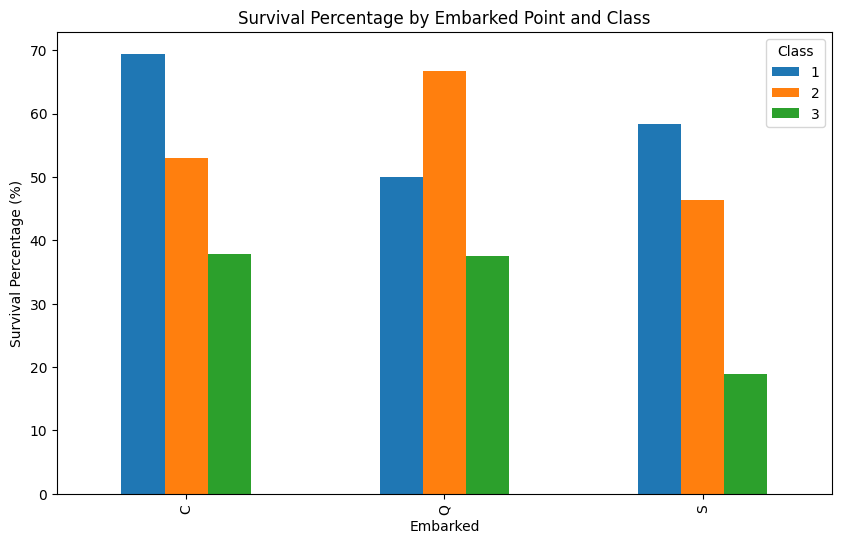

In [219]:
# Group data by 'Embarked', 'Passenger_Class', and 'Survived' and calculate counts
survival_counts = sub_data.groupby(['Embarked', 'Passenger_Class', 'Survived']).size().unstack(fill_value=0)

# Calculate survival percentages for each embarkation point and class
survival_counts['Survival_Percentage'] = (survival_counts[1] / (survival_counts[0] + survival_counts[1])) * 100
survival_counts['Total passengers'] = (survival_counts[0] + survival_counts[1])

# Display the survival percentages
print(survival_counts[['Survival_Percentage', 'Total passengers']])

survival_counts['Survival_Percentage'].unstack('Passenger_Class').plot(kind='bar', figsize=(10, 6)) #Bar plot
plt.title('Survival Percentage by Embarked Point and Class') #Plot title
plt.xlabel('Embarked') # X-axis label
plt.ylabel('Survival Percentage (%)') # Y-axis label
plt.legend(title='Class') #Legend
plt.show() # Display plot

- This is to explore and analyze the survival rate across different embarkation points and passengers classes
- This was just to find if people from same class embarked at same point because if that was so then C embarkation might have highest survival rate becuase everyone was from Class 1 however this can't be completely voided as the number of people embarked are completely different for each location

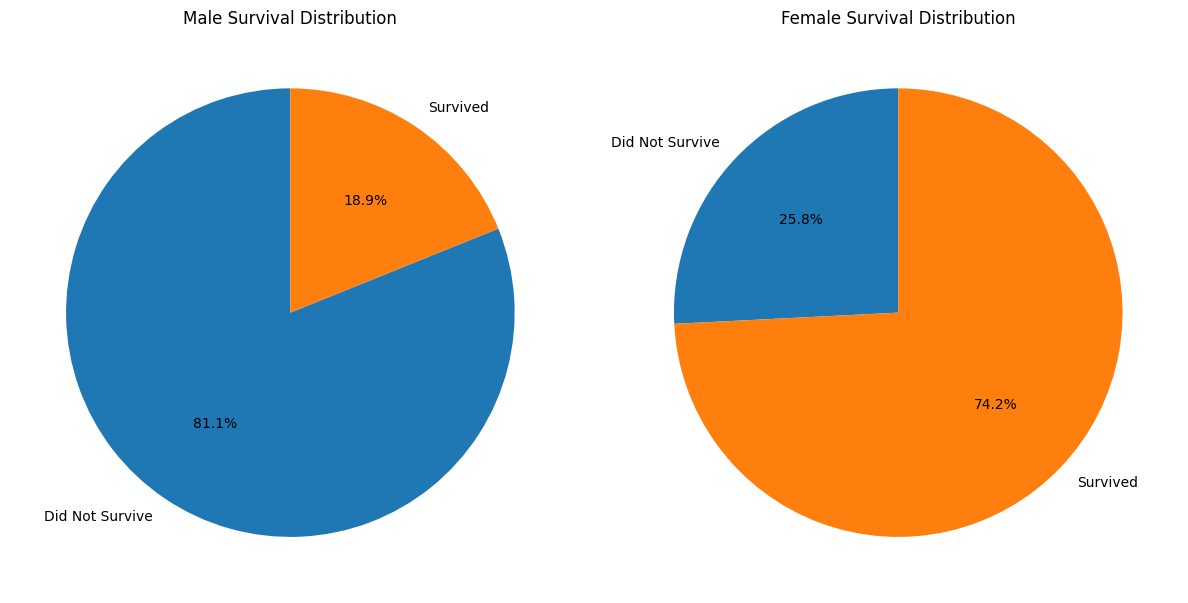

In [220]:
# Survival distribution for Male and Female

# Calculate survival distribution by gender
gender_survival = data.groupby('Sex')['Survived'].value_counts(normalize=True).unstack() # normalize to percentages and unstack is used to resphape grouped data such that survival status becomes columns

# Create pie charts for each gender
fig, axes = plt.subplots(1, 2, figsize=(12, 6)) # Set fig size

# Male survival distribution
axes[0].pie(
    gender_survival.loc['male'],  #Survival proporations of males
    labels=['Did Not Survive', 'Survived'], 
    autopct='%1.1f%%', # Percentage display with one decimal place
    startangle=90 # start with vertical position
) # Pie chart
axes[0].set_title('Male Survival Distribution') #Plot title

# Female survival distribution
axes[1].pie(
    gender_survival.loc['female'], #Survival proporations of females
    labels=['Did Not Survive', 'Survived'], 
    autopct='%1.1f%%', # Percentage display with one decimal place
    startangle=90 # start with vertical position
) # Pie chart
axes[1].set_title('Female Survival Distribution') #Plot title

plt.tight_layout() # adjust spacing between the subplots
plt.show() # Display plot


- This code is to explore the portion of passenger who survived and did not survive within each gender group
- It can be seen that majority of men didn't survive whereas majority women survived showing gender bias

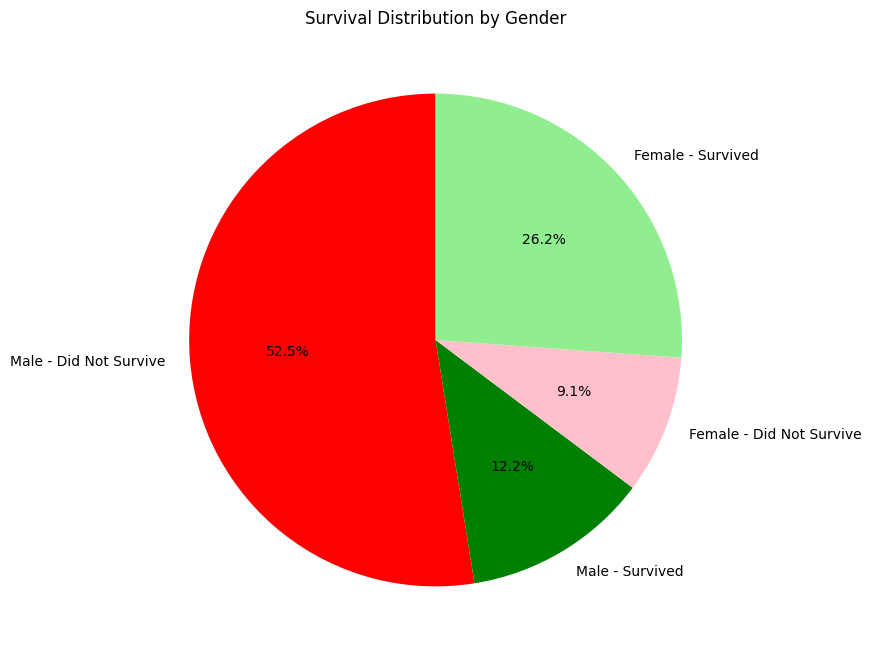

In [221]:
# Calculate survival counts grouped by gender
gender_survival_counts = data.groupby(['Sex', 'Survived']).size().unstack()

# Flatten the data for pie chart
labels = ['Male - Did Not Survive', 'Male - Survived', 'Female - Did Not Survive', 'Female - Survived']
sizes = [
    gender_survival_counts.loc['male', 0],
    gender_survival_counts.loc['male', 1],
    gender_survival_counts.loc['female', 0],
    gender_survival_counts.loc['female', 1]
]

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90) #Pie chart
plt.title('Survival Distribution by Gender') #Plot title
plt.show() #Display plot

- Here I am trying to visualize the survival of both males and females combined to get an overall idea and easy to compare
- Again, same observation most men didn't survive only 12.2% survived whereas only 9.1% of women didn't survive

## 3. EDA

#### The main 3 question I have already mentioned above 

- What is the survival rate across different passenger classes?
  - I am interested in this because it helps to understand if the social class influenced the survival rates that is it highlights the biases in survival based on socioeconomic status
- How does age distribution differ between survivors and non-survivors?
  - This would reveal which age group are more likely to survive. It indicates if age played a role in survival decisions or outcomes which would be interesting to know
- What is the relationship between gender and survival rate?
  - This examines if gender influenced survival rates and its outcome can reveal any biases that shows how males and females are treated during disasters basically gender disparities
- Apart from these as well I tried to explore a couple more questions and did some more analysis
  - How does survival rate vary across different embarkation points?
    - This is interesting because maybe operational factors or location might affect the survival rate.
    - I have also plotted a bar plot for embarked points, passenger class and survival rates just to ensure that not all passengers of same class are from same location. Because if that was the case then they are correlated variables and just having one of them would probably influence the decision of survival
  - How ticket fare relates to age among survivors and non-survivors?
    - This is interesting analysis because it explores correlation between economic factor(fare) and demographic factor(age) in relation to survival. 

## 4. Conclusion

#### What is the survival rate across different passenger classes?
  - 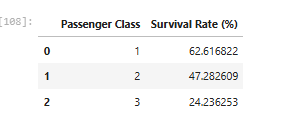
  - 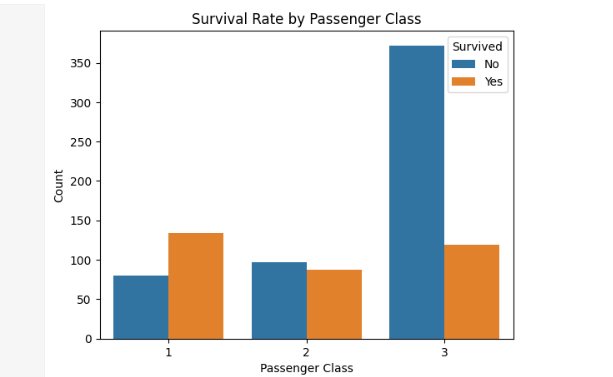
  - The plot also shows that among the 3 classes if compared individual between the survivors and non-survivors: Class 1 had more survivors that non-survivors showing highest survival rate and Class 3 has more non-survivors than non-survivors showing lowest survival rate
#### How does age distribution differ between survivors and non-survivors?
  - 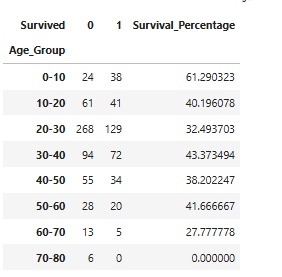
  - 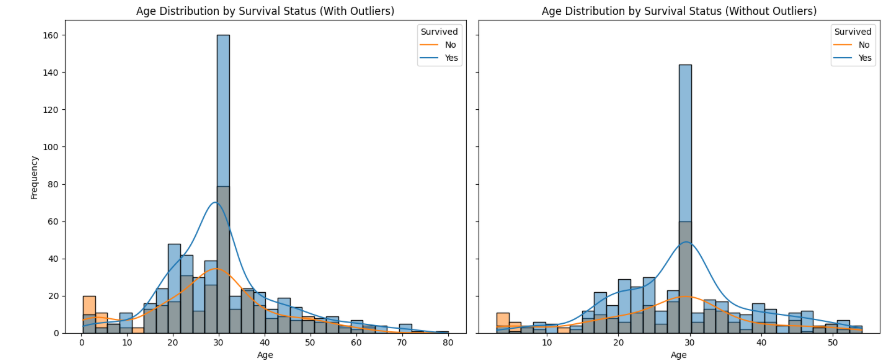
  - Children aged 0-10 had the highest survival rate at 61.3%, likely due to prioritization during evacuation
  - Survival rates decreased significantly for passengers aged 20-30 (32.5%) and older age groups
  - Passengers aged 70-80 had a survival rate of 0%, indicating that elderly individuals faced significant challenges during evacuation
#### What is the relationship between gender and survival rate?
   - 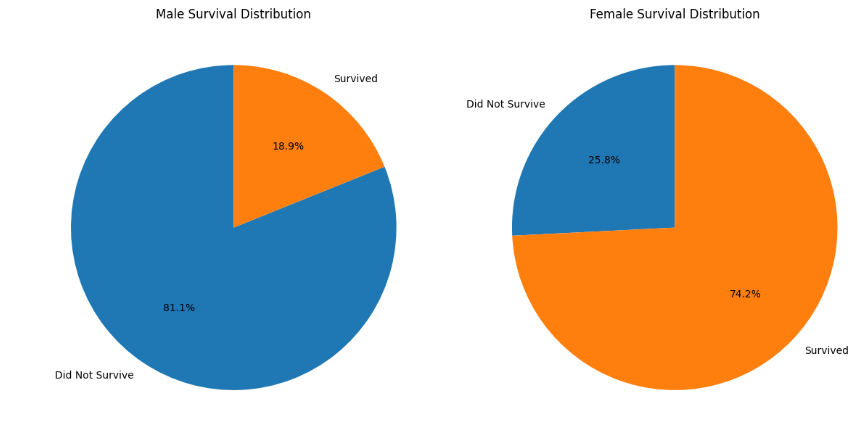
   - 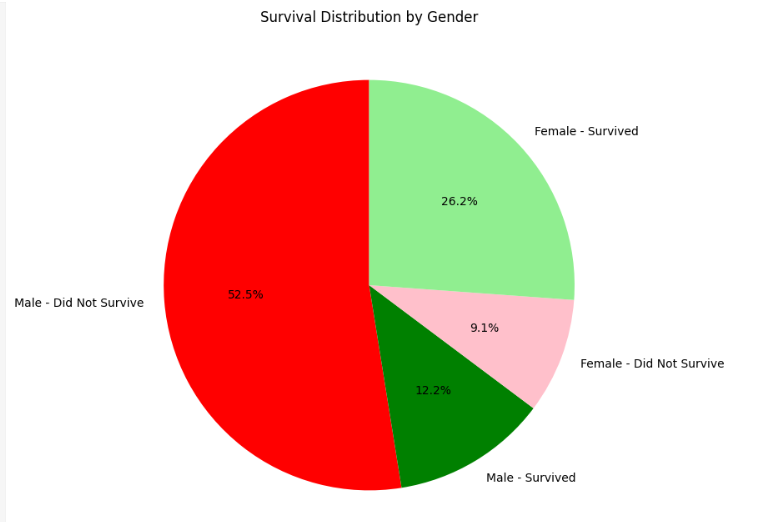
   - Women had a significantly higher survival rate (74.2%) compared to men (18.9%), supporting the "women and children first" evacuation norm
   - Men were far more likely to perish, with over half (52.5%) of all passengers being male non-survivors
#### How does survival rate vary across different embarkation points?
   - 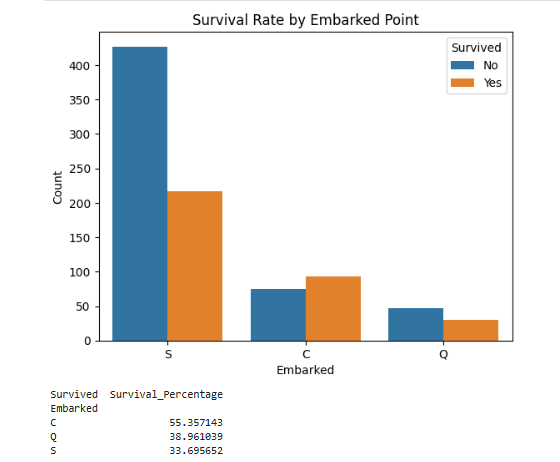
   - Passengers who embarked at C has the highest survival rate
   - S embarked passengers had the lowest survival rate
#### How ticket fare relates to age among survivors and non-survivors?
   - 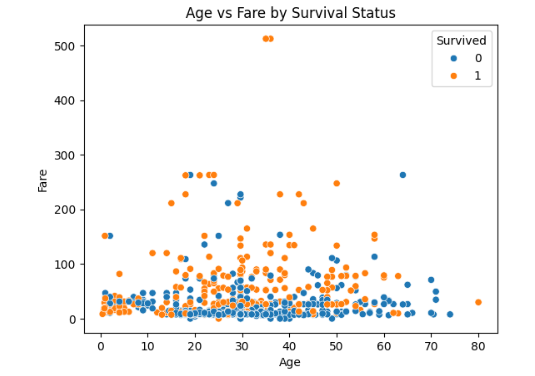
   - Higher ticket fares generally corresponded to higher survival rates, as evidenced by the clusters of survivors with higher fares in the scatterplot
   - Passengers paying lower fares were predominantly non-survivors, indicating a correlation between fare and socioeconomic status
   - Also, among passengers paying lower fares the one younger like small children had higher survivors as the age increased it was seen that the passenger who paid more had more chances of survival

## 5. Summary

- The analysis reveals that survival rates on the Titanic were influenced by multiple factors, including socioeconomic status (class), age, embarkation point, gender, and ticket fare. These factors interacted in complex ways to determine who was more likely to survive the disaster. Understanding these patterns provides insights into the social, economic, and logistical factors that shaped survival outcomes during one of history's most infamous maritime disasters.
- Some of the main factors observed
  - Higher ticket fares generally corresponded to higher survival rates, indicating a correlation between socioeconomic status and survival
  - "Women and children first" principle during evacuation, highlighting societal values and gender-based disparities in survival
- Ideas for future work on the same topic using other relevant datasets
  - As its a disaster dataset, similar analysis can be done on other disaster datasets like Natural disasters, Aviation and other maritime disasters
  - Also, this survival analysis can be really useful in medical field for predicting and analysing cancer survival rate across different treatments and patient demographics to figure out the best treatment for survival

## References

- https://hackernoon.com/15-excel-datasets-for-data-analytics-beginners
- https://matplotlib.org/stable/plot_types/index
- https://seaborn.pydata.org/api.html
- https://pandas.pydata.org/docs/user_guide/index.html
- https://numpy.org/doc/2.2/user/index.html